#**LAB ACTIVITY 10-11**
Bayquen, Christopher Gilbert A.

Continuation of lab activity : Model Implemenatation 6 - 9

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading the dataset
credit_df = pd.read_csv("/content/drive/MyDrive/MACHINE-LEARNING-DS/creditcard.csv")
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Scaling the Time and Amount features

scaler =  RobustScaler()

credit_df['Scaled_Amount'] = scaler.fit_transform(credit_df['Amount'].values.reshape(-1,1))
credit_df['Scaled_Time'] = scaler.fit_transform(credit_df['Time'].values.reshape(-1,1))

credit_df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
#rearranging the dataframe
cols = list(credit_df.columns)
cols = cols[-2:] + cols[:-2]
credit_df = credit_df[cols]

credit_df.head()

,Scaled_Amount,Scaled_Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
#Dividing the original dataset
X = credit_df.drop('Class', axis=1)
y = credit_df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

In [ ]:
# StratifiedShuffleSplit for cross-validation
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
results_list = []

**MODEL IMPLEMENTATION CONTINUATION 6-9**


**6. Support Vector Machines (SVM)** *(5 mins to train)*

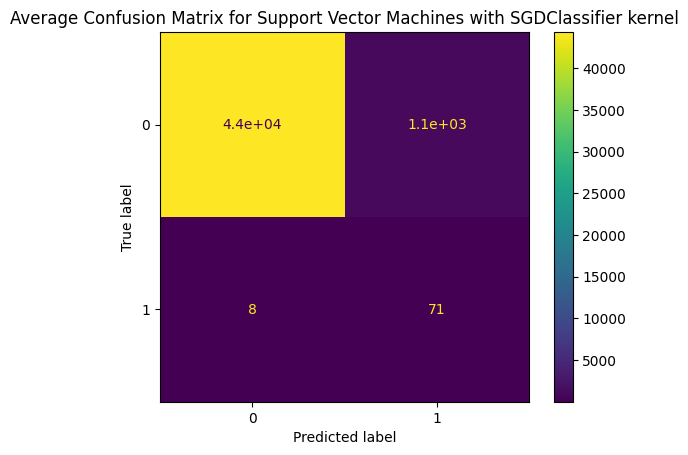

,Model,Accuracy,Precision,Recall,F1 Score
0,Support Vector Machines with SGDClassifier kernel,0.974947,0.061911,0.898734,0.115454


In [ ]:
#Implementing SVM
from sklearn.linear_model import SGDClassifier

svm = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3)

accuracy_lst_temp = []
precision_lst_temp = []
recall_lst_temp = []
f1_lst_temp = []
confusion_matrices_temp = []

for train_index, test_index in sss.split(original_Xtrain, original_ytrain):

    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), svm)
    pipeline.fit(original_Xtrain[train_index], original_ytrain[train_index])
    prediction = pipeline.predict(original_Xtrain[test_index])

    #Calculating Evaluation metrics
    accuracy_lst_temp.append(pipeline.score(original_Xtrain[test_index], original_ytrain[test_index]))
    precision_lst_temp.append(precision_score(original_ytrain[test_index], prediction))
    recall_lst_temp.append(recall_score(original_ytrain[test_index], prediction))
    f1_lst_temp.append(f1_score(original_ytrain[test_index], prediction))

    #Confusion Matrix
    cm = confusion_matrix(original_ytrain[test_index], prediction)
    confusion_matrices_temp.append(cm)

results_list.append({
    "Model": f"Support Vector Machines with SGDClassifier kernel",
    "Accuracy": np.mean(accuracy_lst_temp),
    "Precision": np.mean(precision_lst_temp),
    "Recall": np.mean(recall_lst_temp),
    "F1 Score": np.mean(f1_lst_temp)
})

#average of confusion matrices
avg_conf_matrix = np.mean(confusion_matrices_temp, axis=0)
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=svm.classes_)
disp.plot()
plt.title(f'Average Confusion Matrix for Support Vector Machines with SGDClassifier kernel')
plt.show()


results_df = pd.DataFrame(results_list)
results_df

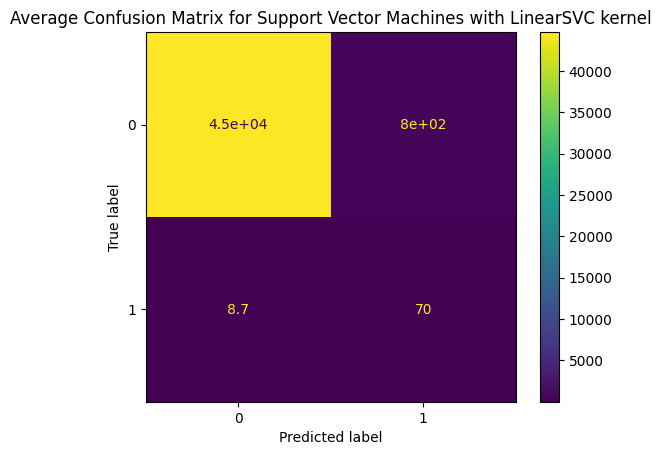

,Model,Accuracy,Precision,Recall,F1 Score
0,Support Vector Machines with SGDClassifier kernel,0.974947,0.061911,0.898734,0.115454
1,Support Vector Machines with LinearSVC kernel,0.982225,0.081638,0.890295,0.149388


In [ ]:

from sklearn.svm import LinearSVC

svm = LinearSVC()

accuracy_lst_temp = []
precision_lst_temp = []
recall_lst_temp = []
f1_lst_temp = []
confusion_matrices_temp = []

for train_index, test_index in sss.split(original_Xtrain, original_ytrain):

    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), svm)
    pipeline.fit(original_Xtrain[train_index], original_ytrain[train_index])
    prediction = pipeline.predict(original_Xtrain[test_index])

    #Calculating Evaluation metrics
    accuracy_lst_temp.append(pipeline.score(original_Xtrain[test_index], original_ytrain[test_index]))
    precision_lst_temp.append(precision_score(original_ytrain[test_index], prediction))
    recall_lst_temp.append(recall_score(original_ytrain[test_index], prediction))
    f1_lst_temp.append(f1_score(original_ytrain[test_index], prediction))

    #Confusion Matrix
    cm = confusion_matrix(original_ytrain[test_index], prediction)
    confusion_matrices_temp.append(cm)

results_list.append({
    "Model": f"Support Vector Machines with LinearSVC kernel",
    "Accuracy": np.mean(accuracy_lst_temp),
    "Precision": np.mean(precision_lst_temp),
    "Recall": np.mean(recall_lst_temp),
    "F1 Score": np.mean(f1_lst_temp)
})

#average of confusion matrices
avg_conf_matrix = np.mean(confusion_matrices_temp, axis=0)
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=svm.classes_)
disp.plot()
plt.title(f'Average Confusion Matrix for Support Vector Machines with LinearSVC kernel')
plt.show()


results_df = pd.DataFrame(results_list)
results_df

**NOTE ON SVM MODELS**

Here we are not using the SVC classifier since our dataset is so large (100k+ rows), we could have made sub-samples, but that would mean losing too much of the data set-- we have already created synthetic samples and cutting them would probably be not help with capturing the data's behavior. Hence, as stated in the SVM package, using sklearn.svm.LinearSVC or ~sklearn.linear_model.GDClassifier instead would suffice since the fit time scales at least
quadratically with the number of samples. Having 100 thousand samples will make training this model take too long.

**7.  Random Forest** *(12 mins to train)*

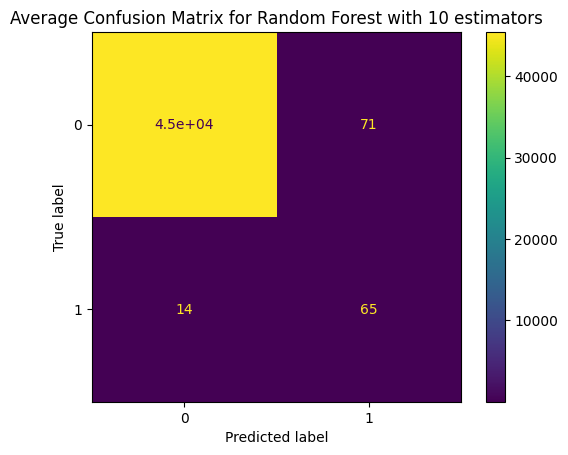

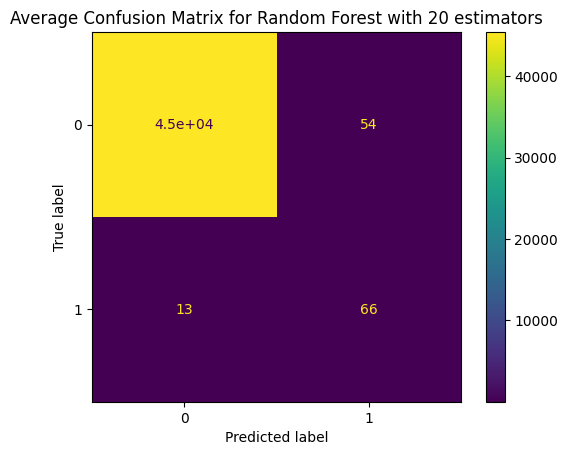

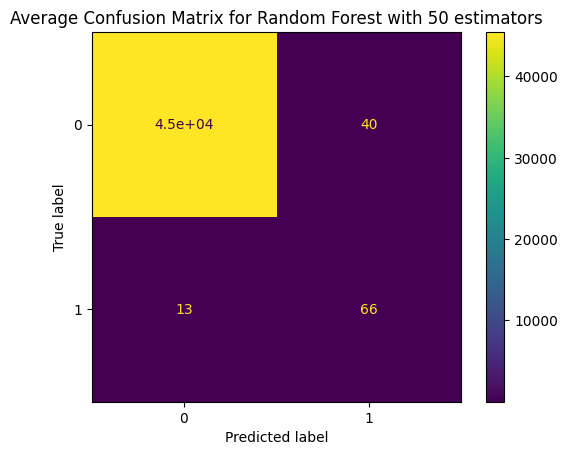

,Model,Accuracy,Precision,Recall,F1 Score
0,Support Vector Machines with SGDClassifier kernel,0.974947,0.061911,0.898734,0.115454
1,Support Vector Machines with LinearSVC kernel,0.982225,0.081638,0.890295,0.149388
2,Random Forest with 10 estimators,0.998127,0.490467,0.822785,0.609340
3,Random Forest with 20 estimators,0.998530,0.556906,0.835443,0.665503
4,Random Forest with 50 estimators,0.998852,0.632505,0.839662,0.718862


In [ ]:
#Implementing Random Forest

n_estimators_list = [10, 20, 50]

for n_estimators in n_estimators_list:

    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth = 10, random_state = 42)

    accuracy_lst_temp = []
    precision_lst_temp = []
    recall_lst_temp = []
    f1_lst_temp = []
    confusion_matrices_temp = []

    for train_index, test_index in sss.split(original_Xtrain, original_ytrain):

        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rf)
        pipeline.fit(original_Xtrain[train_index], original_ytrain[train_index])
        prediction = pipeline.predict(original_Xtrain[test_index])

        #Calculating Evaluation metrics
        accuracy_lst_temp.append(pipeline.score(original_Xtrain[test_index], original_ytrain[test_index]))
        precision_lst_temp.append(precision_score(original_ytrain[test_index], prediction))
        recall_lst_temp.append(recall_score(original_ytrain[test_index], prediction))
        f1_lst_temp.append(f1_score(original_ytrain[test_index], prediction))

        #Confusion Matrix
        cm = confusion_matrix(original_ytrain[test_index], prediction)
        confusion_matrices_temp.append(cm)

    results_list.append({
        "Model": f"Random Forest with {n_estimators} estimators",
        "Accuracy": np.mean(accuracy_lst_temp),
        "Precision": np.mean(precision_lst_temp),
        "Recall": np.mean(recall_lst_temp),
        "F1 Score": np.mean(f1_lst_temp)
    })

    #average confusion matrix
    avg_conf_matrix = np.mean(confusion_matrices_temp, axis=0)
    disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=rf.classes_)
    disp.plot()
    plt.title(f'Average Confusion Matrix for Random Forest with {n_estimators} estimators')
    plt.show()

results_df = pd.DataFrame(results_list)
results_df

**8. Gradient Boosting Machines** *(27 mins to train)*

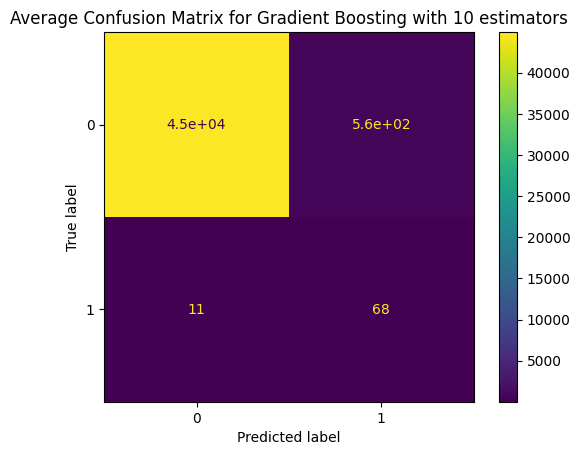

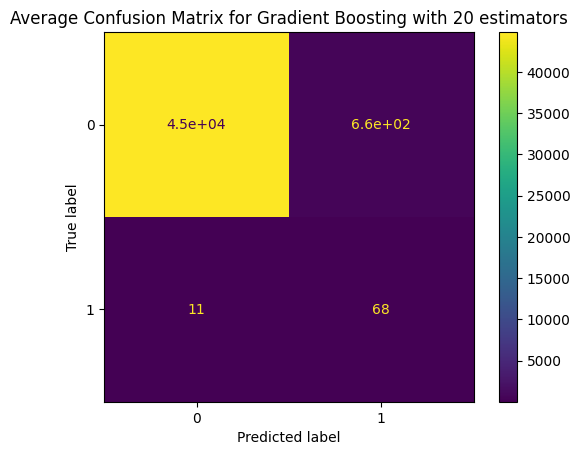

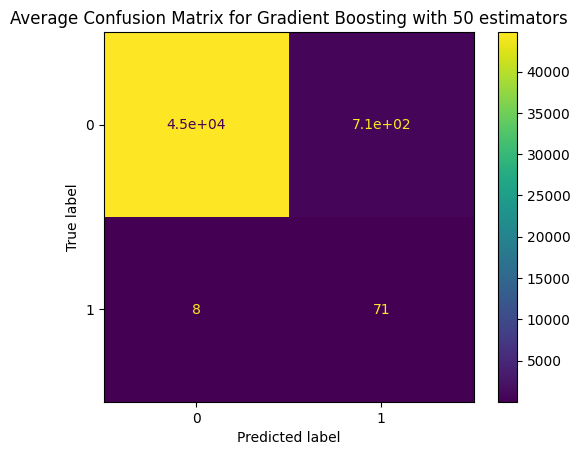

,Model,Accuracy,Precision,Recall,F1 Score
0,Support Vector Machines with SGDClassifier kernel,0.974947,0.061911,0.898734,0.115454
1,Support Vector Machines with LinearSVC kernel,0.982225,0.081638,0.890295,0.149388
2,Random Forest with 10 estimators,0.998127,0.490467,0.822785,0.609340
3,Random Forest with 20 estimators,0.998530,0.556906,0.835443,0.665503
4,Random Forest with 50 estimators,0.998852,0.632505,0.839662,0.718862
5,Gradient Boosting with 10 estimators,0.987397,0.107761,0.860759,0.191507
6,Gradient Boosting with 20 estimators,0.985224,0.097232,0.864979,0.174108
7,Gradient Boosting with 50 estimators,0.984303,0.092338,0.898734,0.167250


In [ ]:
#Implementing Gradient Boost

n_estimators_list =  [10, 20, 50]

for n_estimators in n_estimators_list:

    gb = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=0.1,
        max_depth=3,
        subsample=0.8,
        random_state=42
    )
    accuracy_lst_temp = []
    precision_lst_temp = []
    recall_lst_temp = []
    f1_lst_temp = []
    confusion_matrices_temp = []

    for train_index, test_index in sss.split(original_Xtrain, original_ytrain):

        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), gb)
        pipeline.fit(original_Xtrain[train_index], original_ytrain[train_index])
        prediction = pipeline.predict(original_Xtrain[test_index])

        #calculating evaluation metrics
        accuracy_lst_temp.append(pipeline.score(original_Xtrain[test_index], original_ytrain[test_index]))
        precision_lst_temp.append(precision_score(original_ytrain[test_index], prediction))
        recall_lst_temp.append(recall_score(original_ytrain[test_index], prediction))
        f1_lst_temp.append(f1_score(original_ytrain[test_index], prediction))

        #Confusion Matrix
        cm = confusion_matrix(original_ytrain[test_index], prediction)
        confusion_matrices_temp.append(cm)

    results_list.append({
        "Model": f"Gradient Boosting with {n_estimators} estimators",
        "Accuracy": np.mean(accuracy_lst_temp),
        "Precision": np.mean(precision_lst_temp),
        "Recall": np.mean(recall_lst_temp),
        "F1 Score": np.mean(f1_lst_temp)
    })

    #average confusion matrix
    avg_conf_matrix = np.mean(confusion_matrices_temp, axis=0)
    disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=pipeline.classes_)
    disp.plot()
    plt.title(f'Average Confusion Matrix for Gradient Boosting with {n_estimators} estimators')
    plt.show()

results_df = pd.DataFrame(results_list)
results_df

**9. XGBoost** *(1 min to train)*

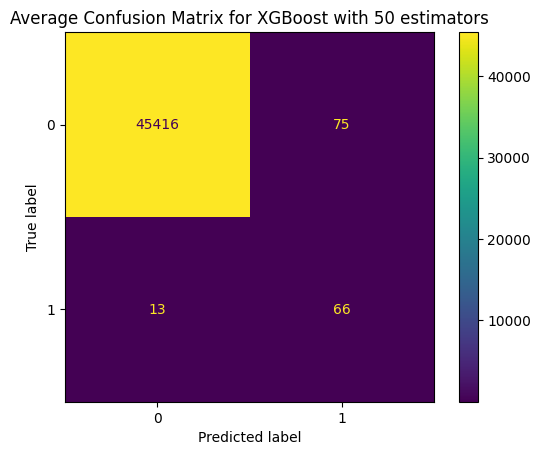

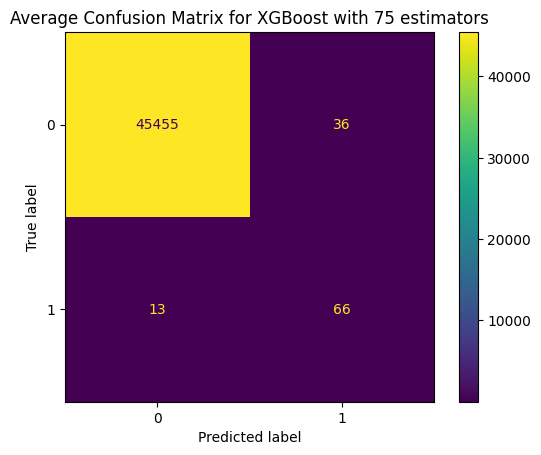

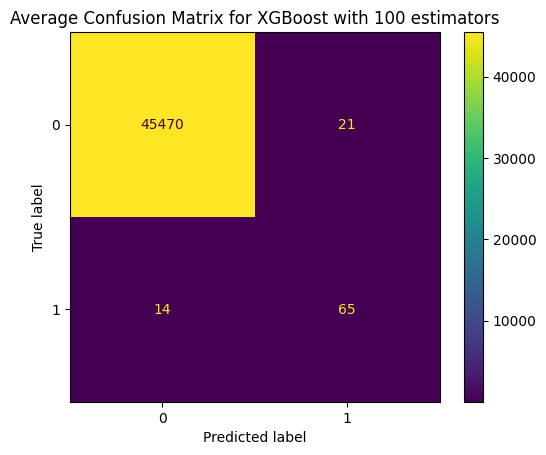

,Model,Accuracy,Precision,Recall,F1 Score
0,Support Vector Machines with SGDClassifier kernel,0.974947,0.061911,0.898734,0.115454
1,Support Vector Machines with LinearSVC kernel,0.982225,0.081638,0.890295,0.149388
2,Random Forest with 10 estimators,0.998127,0.490467,0.822785,0.609340
3,Random Forest with 20 estimators,0.998530,0.556906,0.835443,0.665503
4,Random Forest with 50 estimators,0.998852,0.632505,0.839662,0.718862
5,Gradient Boosting with 10 estimators,0.987397,0.107761,0.860759,0.191507
6,Gradient Boosting with 20 estimators,0.985224,0.097232,0.864979,0.174108
7,Gradient Boosting with 50 estimators,0.984303,0.092338,0.898734,0.167250
8,XGBoost with 50 estimators,0.998069,0.470049,0.839662,0.601728
9,XGBoost with 75 estimators,0.998932,0.648004,0.839662,0.731299


In [ ]:
from xgboost import XGBClassifier

n_estimators_list = [50, 75, 100]

# Iterate over different values of n_estimators
for n_estimators in n_estimators_list:
    xgb = XGBClassifier(
        n_estimators=n_estimators,
        max_depth= 5,
        random_state=42
    )

    accuracy_lst_temp = []
    precision_lst_temp = []
    recall_lst_temp = []
    f1_lst_temp = []
    confusion_matrices_temp = []

    for train_index, test_index in sss.split(original_Xtrain, original_ytrain):

        # Create a pipeline with SMOTE and XGBoost
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), xgb)
        pipeline.fit(original_Xtrain[train_index], original_ytrain[train_index])
        prediction = pipeline.predict(original_Xtrain[test_index])

        # Calculate evaluation metrics
        accuracy_lst_temp.append(pipeline.score(original_Xtrain[test_index], original_ytrain[test_index]))
        precision_lst_temp.append(precision_score(original_ytrain[test_index], prediction))
        recall_lst_temp.append(recall_score(original_ytrain[test_index], prediction))
        f1_lst_temp.append(f1_score(original_ytrain[test_index], prediction))

        # Compute confusion matrix
        cm = confusion_matrix(original_ytrain[test_index], prediction)
        confusion_matrices_temp.append(cm)

    results_list.append({
        "Model": f"XGBoost with {n_estimators} estimators",
        "Accuracy": np.mean(accuracy_lst_temp),
        "Precision": np.mean(precision_lst_temp),
        "Recall": np.mean(recall_lst_temp),
        "F1 Score": np.mean(f1_lst_temp)
    })

    # Average confusion matrix
    avg_conf_matrix = np.round(np.mean(confusion_matrices_temp, axis=0)).astype(int)
    disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=pipeline.classes_)
    disp.plot()
    plt.title(f'Average Confusion Matrix for XGBoost with {n_estimators} estimators')
    plt.show()


results_df = pd.DataFrame(results_list)
results_df


##**Model Evaluation and Analysis**

In [ ]:
#Combining all of the results dataframes from previous notebook

results_1 = pd.read_csv("/content/drive/MyDrive/MACHINE-LEARNING-DS/results_1.csv")
final_results = pd.concat([results_1, results_df], ignore_index=True)
final_results.sort_values(by='F1 Score', ascending=False, inplace=True)
final_results

,Model,Accuracy,Precision,Recall,F1 Score
18,XGBoost with 100 estimators,0.999247,0.759761,0.827004,0.791833
17,XGBoost with 75 estimators,0.998932,0.648004,0.839662,0.731299
12,Random Forest with 50 estimators,0.998852,0.632505,0.839662,0.718862
1,KNN with 3 neighbors,0.998588,0.561750,0.848101,0.675531
11,Random Forest with 20 estimators,0.998530,0.556906,0.835443,0.665503
10,Random Forest with 10 estimators,0.998127,0.490467,0.822785,0.609340
2,KNN with 5 neighbors,0.998069,0.469786,0.856540,0.606294
16,XGBoost with 50 estimators,0.998069,0.470049,0.839662,0.601728
13,Gradient Boosting with 10 estimators,0.987397,0.107761,0.860759,0.191507
14,Gradient Boosting with 20 estimators,0.985224,0.097232,0.864979,0.174108


**Analysis**

As we can observe above, different models were trained and tested on the dataset which was initally heavily imbalanced on `class`. An approach was made to consider this imbalancess of the dataset with using the SMOTE technique while cross validating each of the models-- this might have cost us time in the modelling process, however, as we can see in the evaluation metrics of the models above, it definitely helped the models to perform better.

The evaluation of multiple classification models revealed that `XGBoost with 100 estimators` consistently outperformed others, achieving the highest `accuracy (0.999247)`, `F1 score (0.791833)`, and a balanced trade-off between `precision (0.759761)` and `recall (0.827004)`. This balance makes it the most reliable model overall.

Models like XGBoost with 75 estimators and Random Forest with 50 estimators also showed strong performances, particularly excelling in recall, which minimizes false negatives. However, their **lower precision** resulted in slightly reduced F1 scores compared to XGBoost with 100 estimators. Conversely, models such as Gradient Boosting, Logistic Regression, and Naive Bayes, though achieving decent recall and accuracy, had **extremely low precision**, leading to poor F1 scores and making them **unsuitable** for this dataset.

Considering that we are handling credit card fraud data, choosing the best model based on F1 score is particularly appropriate in this context because it balances the trade-off between precision and recall, which is critical when both false positives and false negatives can have significant implications.

##**Time Spent and Challenges**
**Time spent : ~10 hours**

I really did not expect for this lab activity to take so long to accomplish in the first time I attempted to do this activity. Most of the time that I have spent in accomplishing this task was spent with figuring out how to handle the imbalance of the dataset; At first I tried modelling without tackling the said problem, and as expected, all of the models overfitted due to to the extreme skewness of the `class` feature. Almost all of the models created during this period gave a 99% value for the accruacy while 0% for everything else-- this was largely because when I split the dataset into the train/test splits, only 2 transaction values for the y_test values were considered to be fraud transactions. Out of the 100,000 rows we have, only 2 of those were considered fraud, which, obviously, did not help with making our model capture the pattern of fraud transactions. So, I spent so much time reading on how to handle these imbalances considering that 99% of our data set is considered as non-fraud. Eventually, I have stumbled on the idea of undersampling and oversampling.

Reading further about these concepts, it was recommended to use oversampling through the SMOTE technique, which creates synthetic variables to even out the imbalance of our dataset. However, it was not easy to implement at all-- considering that our dataset handles 200,000 rows, making 100,000+ synthetic variables will definitely affect our model if we trained and tested them on non-real values. I tried modelling with this first to see how it does affect the performance of our model, and it turns out, training and testing on oversampled data makes our model overfit-- so it was not good. I needed to find another approach on handling this issue, and I have read that when testing and training for the model, we should never test the model on oversampled/undersampled data; hence, the approach to use the SMOTE technique during the cross-evaluation of the model will make sure that SMOTE is applied inside each cross-validation fold, generating synthetic samples only for the training portion of that fold. The test data remains untouched and unseen during training.

Through pipelines, this was made possible. However, because of the necessity to include the SMOTE process during the cross-validation, and considering that our dataset involved 200,000 rows, the trade-off for a more accurate and better performing model was the training/testing time. One of the biggest challenge that I am currently experiencing right now is the amount of time it takes to train each model. As I am currently writing this reflection, I am still training the KNN models (which is currently executing 30 mins in), with one model done (KNN with 3 neighbors).  Initially, i have created the cross-evaluation pipeline to have 5 folds, however, it just took too long to finish so I eventually settled for 3 folds. As we can observe, the models still achieved such better results when using a pipeline to implement the SMOTE process while cross-validating.

The biggest challenge that I have encountered when finishing this activity is modelling the SVM models. I didnt have the foresight to understand how large our data set is, and training the model using the entire training split with the SVC classifier was a bad idea. In the documentation of sklearn it was explicitly written that it is not recommended to use SVC on very large datasets, and I did not see it before attempting to train multiple models with different parameters-- I left the model training overnight and woke up to it still training. It was frustrating to say the least. However, I did find a work around and used a different SVM classifier instead.
